**``mayavi``**
---


In [2]:
from mayavi import mlab
import numpy as np
import pandas as pd


In [15]:
x,y=np.ogrid[-2:2:20j,-2:2:20j]
z=x*np.exp(-x**2-y**2)
pl=mlab.surf(x,y,z)
mlab.outline(pl)
mlab.show()

In [36]:
import torch
import torch.nn as nn

# 定义简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 14 * 14, 10)  # 假设输入图像尺寸为28x28

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # 展平特征图
        x = self.fc(x)
        return x

# 创建模型实例
model = SimpleCNN()

# 打印模型结构
print(model)


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)


输入结果的形状: torch.Size([1, 1, 28, 28])
输出结果的形状: torch.Size([1, 10])
预测概率: tensor([[0.0648, 0.1514, 0.0867, 0.1384, 0.1163, 0.0868, 0.1397, 0.1074, 0.0506,
         0.0579]], grad_fn=<SoftmaxBackward0>)


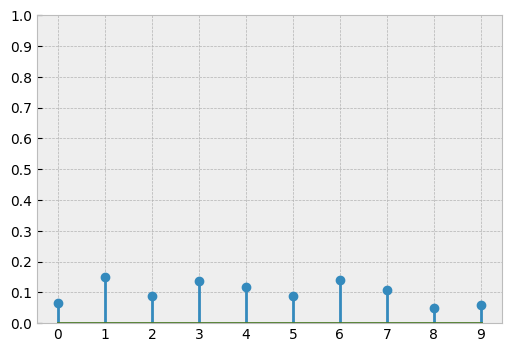

In [71]:
# 创建模型实例
model = SimpleCNN()

# 创建随机测试数据
batch_size = 1
channels = 1
height = 28
width = 28
input_data = torch.randn(batch_size, channels, height, width)

# 将输入数据输入模型进行前向传播
output = model(input_data)

# 打印输出结果的形状
print("输入结果的形状:", input_data.shape)
print("输出结果的形状:", output.shape)
import torch.nn.functional as F

# 对输出结果应用softmax函数
probabilities = F.softmax(output, dim=1)

# 打印预测概率
print("预测概率:", probabilities)
probabilities.sum()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig,axs=plt.subplots(figsize=(6,4))
plt.style.use('bmh')
x=np.arange(0,10)
y=probabilities.detach().numpy()
y=y.reshape(10,-1)
axs.set_ylim(0,1)
axs.xaxis.set_major_locator(ticker.MultipleLocator(1))#主刻度
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.1))#主刻度
axs.stem(x,y)
plt.show()